# 3 Monte Carlo Simulations 

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
init_printing()                         # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 16})  # set font size for plots

## 3.1 Concept and motivation

In numerically integrating differential and other equations, a number of methods are available. Some Monte Carlo methods are described in earlier sections and other methods are described in Chapter 11. In this section simulations are described. A simulation uses the underlying physical laws and principles to control the calculation; no differential equations will be used. Usually processes, such as the decay of an excited state, the dispersal of a population of animals, or diffusion of molecules, can be simulated by taking a stochastic approach to the problem, repeating many calculations and slowly building up the results. This approach may seem rather odd; why not just solve the equations and be done with it? Well, sometimes this approach is simply pragmatic; a Monte Carlo approach is sometimes simpler and quicker to use. More often, it is the case that the equations describing some complex phenomenon cannot be solved algebraically or are simply not known because the process being studied is too complex. In these cases, we turn to the underlying physical laws and principles to control a simulation. Other examples of problems that can be studied are reaction kinetics, nuclear spins interacting with one another in a solid, ions moving through membrane pores, animals or people infecting one another, the spreading of forest fires, and oil moving through pores in rocks and so forth. Any computer simulation should be repeated many times to obtain an average value and then repeated again with many different initial values to explore the problem properly and to learn what are the important parameters that control behaviour.

Two classes of Monte Carlo calculations must be clearly distinguished. The class described in the last section uses a Monte Carlo method to solve rate equations or, in general, differential equations. The method now described is to *simulate* a physical process from first principles without explicitly solving equations. The algorithms to do these two types of calculations are, in many cases, rather similar, but the way they operate is fundamentally different.

## 3.2 Simulating physical processes

As this is a very general approach, and in principle applies to almost any process, there are no fixed rules other than to understand the problem at a fundamental level and then decide how it can be broken down into individual steps. Random numbers are always used to decide what is going to happen next, and the result of many trial calculations summed to remove any bias set up by the random nature of the process. It is important to bear in mind that we do not try to simulate any actual physical process but rather use a sort of pseudo-dynamics to reach the result by taking one atom or molecule at a time and deciding what it might end up doing, and then repeating this numerous times until we are satisfied with the result according to some predetermined condition.

As an example, consider simulating one-dimensional molecular diffusion. This could describe the diffusion of a molecule inside a long nanotube, along a channel in a zeolite or along a path into an enzyme's active site. At any particular point, the molecule could be buffeted by a solvent molecule and knocked forwards or backwards. To idealize the problem we assume that each displacement or step is of the same length. More colourfully, it has become the convention in textbooks to describe a random walk as the meanderings of the proverbial drunkard.
In the simulation of a random walk, only discrete steps can be taken $1, 2, 3 \cdots$ and so on. A random walk of this discrete type is described as a Markov chain of events in which the next event to occur depends only on the current situation or state and has no history of past events because each event has to be independent of all others.

The walk is random and also unbiased, which means that the chance of moving to the right or to the left at any step is equal to $1/2$. Suppose that a walk can have only two steps, then there are four ways of moving and only three places the walk can end up, which is either where it started, or two steps to the left, or two to the right. The chance of two left moving steps, or a left and a right, is $1/4$. Similarly, the chance of a right-hand step and then a left-hand one, or of two right steps, is $1/4$. The chance, therefore, of returning to the starting place is $1/2$, and it is $1/4$ of moving, either two places to the right, or two to the left, of the start. After three steps, the walker can have moved three steps to the right or to the left, or two right and one left, and vice versa, or two left and one right, and vice versa. After an odd number of steps, the walker cannot be at the start of the walk. Clearly, the number of combinations of left and right steps soon becomes complicated but it is, nevertheless, calculable. The probability of ending up at different positions is shown in the table. The sums of each row add to one as these entries represent probability. These probabilities can be calculated by the binomial distribution, and, when fractions are cleared, Pascal's triangle results.

In an unbiased random event if $p$ is the probability of success in any single event, the probability of $k$ successes after $n$ attempts is the binomial distribution

$$\displaystyle  P(k,n,p)=\frac{n!}{k!(n-k)!}p^k\left( 1-p \right)^{n-k}$$

and for example the chance of throwing a die three times so that each time the same number appears is $P(3, 3, 1/6) = 1/63$, the $1/6$ appears because there a 6 sides on a die. The factor 

$$\displaystyle \frac{n!}{k!(n-k)!}=\binom{n}{k}$$

is called the binomial coefficient.

In terms of the random walk, 'success' means that after a total of $n$ steps, the walker is at position $k$ steps away from the starting point. To calculate this probability, suppose that in a random walk of length $2n$, there are $x$ steps taken to the right, then $2n - x$ must be taken to the left. Therefore, the walker ends at position $x -(2n - x) = 2(x - n)$. If $x$ steps are taken to the right out of a total of $2n$ then the probability of this is

$$\displaystyle P(x,2n,p)= \frac{(2n)!}{k!(2n-k)!}p^x\left( 1-p \right)^{2n-x}$$

however, this can only be true if the walk ends at position $2(x-n)=2k$. Therefore $x=n+k$, giving

$$\displaystyle P(n+k,2n,p)= \frac{(2n)!}{(n+k)!(n-k)!}p^{n+k}\left( 1-p \right)^{n-k}$$

as the probability of being at $k$ after $2n$ steps. When $p = 1/2$ and four steps are taken $(n = 2,\; k = 2)$ this equation gives a probability of $1/16$ as shown by the bottom right entry in the table.

$$\displaystyle \begin{array}{c|cccccccc}
\hline
\text{steps} & & & & -&\text{position} & +& & & \\
  &-4 & -3&-2 &-1 &0 &+1 &+2 &+3 &+4 \\
\hline
0 &  & &  &  &1 &  & &  &  \\
1 &  & &  & 1/2 & & 1/2 & &  &  \\
2 &  & &1/4  &  & 1/2&  &1/4 &  &  \\
3 &  &1/8 &  & 3/8 & & 3/8 & & 1/8 &  \\
4 &1/16  & &4/16  &  & 6/16&  &4/16 &  & 1/16 \\
\hline
\end{array}$$

## 3.3 Simulation of one-dimensional diffusion. Brownian motion &  Ehrenfest Diffusion 

### **(i) Brownian motion**

In diffusion, time, and distance are linked by Fick's second law; Chapter 10.6.2 (iv). However, in a simulation, this equation is not used and the position where the walk ends after a fixed number of total jumps is calculated. This is repeated many times and a histogram made of the final positions. To make the walk last a longer time, a larger total number of jumps is taken because each jump is supposed to take an equal time. In the Monte Carlo simulation, the total number of steps, s, must be decided beforehand. The walk must start at only one place, say $x_0$, and as there is an equal chance of moving to the right or left, the starting place of the walk will also be the mean value $\langle x_0 \rangle$. The root mean square distance the walker moves in taking $s$ steps, is $\sqrt{s}$.

Using a random number generator in the range $0 \to 1$ to determine the direction of each step, the position where the walker ends after completing the total number of steps is recorded. This value is stored in an array. It is important to remember to calculate the result only where the walker stops after the total number of steps is completed, and to record this value. To prevent the walker leaving either end of the array used to hold the final positions, we could make the array many times   s so the walk cannot reach the end within the number of allotted steps. Alternatively, and more reliably, we can check when the ends are reached, but this will make the calculation a little slower. Finally, the calculation is repeated to improve the statistics.

Start the walk at the centre of the array prob, by making its length an odd number n, then the centre is at $(n - 1)/2$. If the walk consists of an even number of steps, then the walker must end up an even number of positions away from the starting point, $0,\; \pm 2,\; \pm 4$, and so forth. Stored in an array, these steps leave every odd-numbered array index as zero. To avoid having a graph with every other point as zero, the change in the number of positions away from the starting point can be divided by two, because it is an even number, and then added to the index of the starting point $(n - 1)/2$. The variable m in the code below is the number of jumps away from the start. The algorithm below only works, as written, for an even number of steps in a walk, or as $2n$ steps for odd-numbered $n$. To calculate the distance moved, a second array must contain only even numbers with the value zero at the starting point index $(n - 1)/2$; this is array $\mathtt{xdata}$. Each jump is taken to be one time step; therefore, the number of jumps is equivalent to time.

![Drawing](monte-carlo-fig9.png)

Figure 9. Labelling a random walk.
_______
In the calculation, the parameters and arrays are defined first. A random number between $0$ and $1$ is produced and a check is made to see if it is $\lt 0.5$. If it is, this is taken to be a right-hand jump and $1$ is added to the counter $m$, if not, $1$ is subtracted from $m$. The loop $\mathtt{for\; L\; in\; range(reps):}$ and the associated $\mathtt{pass}$ later on, make the calculation repeat $\mathtt{reps}$ times. The array $\mathtt{xdata}$ contains the position away from the start of the walk.

In [11]:
# Algorithm: 1D random walk 
rng = np.random.default_rng()               # initialise random number generator
n    = 501                                  # walk array size
steps= 50                                   # number of time steps
reps = 5000                                 # repeats
prob = np.zeros(n,dtype =float)             # array for probability
xdata= np.zeros(n,dtype =float)             # x positions
mdata= np.zeros(reps,dtype =int)            # array to hold distance from start
c = ( n - 1 )//2
for L in range(reps):
    m = 0   
    for j in range(steps):
        r = rng.uniform()                   # choose random number 0-1
        if r < 0.50 :
            m = m + 1                       # move right one step
        else:
            m = m - 1 
        pass
    mdata[L] = m
    prob[c + m//2] = prob[c + m//2] + 1     # calculate probabilty at each position, // is integer division
    pass                                    # end of ‘for L ..reps’

for i in range(n):
    xdata[i] = (-c + i )*2                  # distance from start, only even x numbers

# plot data. Plot either one or the other but not both together on same plot
#plt.plot(mdata[0:50],color='red')                         # displacement from start left in fig10
#plt.scatter(xdata[c-50:c+50],prob[c-50:c+50],s=5, color='blue')          # distribution
#plt.show()

The results are shown figure 10. On the left, position vs time, in terms of steps taken, is shown for three different walks. On the right, the probability histogram is shown. Before plotting the array, prob was normalized by dividing by the number of repetitions and then by two because the distance stepped is always even. The Gaussian or normal distribution 

$$\displaystyle p(x) =\frac{1}{\sigma \sqrt{2\pi}}e^{(x-\langle x\rangle )^2/2\sigma^2}$$

is the probability of the walker being found at position $x$ where $\langle x\rangle$ is the mean position, which is zero in this calculation, and $\sigma$ the standard deviation of the walker's position. This probability is 'continuous', $x$ can take any value, unlike the probability calculated by the discrete random walk; however, the agreement between the two calculations is very good. The graph below shows that if there are $s$ steps in the random walk, then $\sqrt{s} = \sigma$. As an exercise, calculate the distribution for other walk lengths. You should find that as the walk gets longer, the peak is less and the wings broader, as common sense would dictate for diffusion.

![Drawing](monte-carlo-fig10.png)

Figure 10. Left: The position vs time (as number of steps) of a random walker. Right: Five thousand simulations of a random walker forming a discrete distribution of 50 steps each and the distribution from walker following an unlimited number of steps and so forming a Gaussian distribution $p(x)$ with $\sigma = 50$ (blueline).
_____

Two or three dimensional diffusion can also be calculated. In the 2_D case a simpler algorithm is used. All that is done is to move plus or minus one step either in $x$ or $y$ direction and then the trajectory plotted. As only one trajectory is plotted the walk is very individual, only a snapshot of one of many possible walks, and only after numerous repeated walks are added together will any distribution along $x$ or $y$ resemble a Gaussian as predicted by diffusion theory. Similarly the average position after many walks will be zero in both $x$ and $y$, i.e. $\langle r\rangle =0$ where $r=\sqrt{x^2+y^2}$ and after $n$ jumps $\langle r^2\rangle \sim n$ where $n\sim \text{time}$.

In [12]:
# Algorithm 2D random walk
rng = np.random.default_rng()               # initialise random number generator
steps= 10000                                # number ofsteps
xdata = np.zeros(steps,dtype =float)        # position
ydata = np.zeros(steps,dtype =float)        # position
z = np.linspace(0,steps,steps)

for i in range(1,steps,1):
    xdata[i] = xdata[i-1]+rng.integers(-1,2)
    ydata[i] = ydata[i-1]+rng.integers(-1,2) 
#plt.plot(xdata,ydata, linewidth=1,color='grey')
#plt.show()

![Drawing](monte-carlo-fig10a.png)

Figure 10a. One trajectory of a 2D random walk on a grid, where each step is randomly $\pm1$ or zero jump in $x$ and $y$. Many such trajectories would produce a 2D gaussian profile. The color roughly indicates the time taken by the walk, starting with green and ending in red.
___________________________

### **(ii) The Ehrenfeld Diffusion problem or Two Dogs and Fleas**

The Ehrenfest model is used to describe the self-diffusion of a gas between two bulbs A and B of equal volume by means of a single pore in a semi-permeable membrane separating them. The volumes remain fixed and isolated, thus the temperature is constant and no heat exchanged with the surroundings and no work is done. The simulation calculates, at each  time step, the chance of just two molecules travelling from volume A to B or vice versa so that the number in each volume remains the same. The particles (molecules) are 'labelled' so that the change in their numbers can be followed. The process is stochastic and has been described as similar to the transfer of fleas from one dog to another. Although the molecules are supposed to be identical nevertheless they have to be labelled and so identified for the purposes of calculation.  In a real experiment we would have to use molecules as identical in their properties as possible, for example, ortho- and para-hydrogen, or a gas such as SF$_6$ with different S isotopes such that the mass is only changed by $1$% or less. Diffusion will effectively be the same for every molecule but these can be identified in an experiment, and this means that this model has at least a reasonable chance of being able to be confirmed by experiment. 

If molecules of a given type are all initially in one volume, and an equal number of others in the second volume once diffusion is allowed to start, say by removing a partition, after some time the molecules will both be spread more or less evenly between the two volumes. However, by the same arguments that says that they will spread one way they could also be expected to return, i.e. there is clearly a chance that after a time all the molecules that were initially in volume A will return to A again, and repeatedly do so, but this breaks the second law of thermodynamics and more importantly goes against experience of how a large volume of gas behaves. If all molecules of one type are in A, initially doubling their volume by diffusing into B increases their entropy by $R\ln(2)$ and, clearly, if they are subsequently all back in A again then the entropy is reduced by the same amount. This *recurrence* effect or rather the lack of observing it in normal experiments provided Boltzmann with considerable difficulties in trying to explain thermodynamics in terms of the kinetic theory. This was because Poincare, treating the molecules as a dynamical system, showed unequivocally that the initial state will be reformed to an arbitrary degree of accuracy, i.e. one should expect to see all the molecules return to their original state. However, this is never observed in normal life, the gas in a room does not suddenly leave a void here and there. Similarly, a drop of a dye when added to a solution will diffuse to fill all the volume and then later on one never finds it has reformed into the initial drop. These things should and could happen but are not observed and this is why this nearly wrecked Boltzmann's work. It was mainly through the work of Ehrenfest and Smoluchowski that the situation was resolved, and the answer to not observing recurrence, was in Boltzmann's words, 'you wait!'. With the Ehrenfest model the time you have to wait for $n$ molecules to return to their original state after starting to diffuse is $\sim 2^{2n}$, which looks quite innocuous but if you work it out even for as few as $n=1000$ molecules it is a time longer than the age of the universe for all reasonable transitions lasting fractions of a second. Hence you wait, and kinetic theory as described by Boltzmann and Poincare's objection are reconciled. The recurrence takes so long because there is an overwhelmingly large number of initial states and returning to that one is therefore highly unlikely. This also reconciles classical thermodynamics and the statistical mechanics interpretations of entropy, and shows that entropy is a statistical law reliant on there being vast numbers of particles involved. With the advent of experiments to observe the behaviour of single molecules we should expect to see that the second law can be broken but only in special circumstances. 

Recurrence in a dynamical system can be observed in the dynamics of the excited state of molecules when excited by a very short, picosecond or femtosecond laser pulse. The pulse has a wise spectrum as it is of short duration and can therefore excite several energy levels which then come into and go out of phase, the rotational and vibrational recurrences being seen as the wavefunctions propagates, see Chapter 5-9.

### **Simulation. Time taken to reach equilibrium**
To simulate diffusion between the two volumes we start with $n$ white balls in A (which we will call volume 1) and label these as $w_1$ and $n$ black ones in B (volume 2) as $b_2$ and in each step of the process three choices are made to decide what happens. Two random numbers, $r_1,r_2$, are chosen between $0$ and $1$ so that they cover the range of a probability. Next, calculate the probability of transfer for type w particles which is $p_w = w_1/n$, and for b particles $p_b = b_2/n$. If both the random numbers ($r_1,r_2$ fig 10b) are larger than these probabilities we increase by one the number of $w_1$ in volume 1 and $b_2$ in volume 2 because a white ball was selected from volume 2 and a black one from volume 1.  Similarly,  decrease by one the molecule numbers of $w_1$ and $b_2$ if $r_1$ and $r_2$ are both less than their respective probabilities ($p_w,p_b$) meaning that a black ball was selected from volume 2 and a white one from volume 1. Any other choice replaces white with white and black with black so there is no change, so do nothing, see fig 10b. The number $w_1$ and $b_2$ in each volume is recorded and the process repeated. Figure 10c shows the outcome where the number of $w_1$ is plotted vs. the number of steps taken.  Note that the molecule are identical in each bulb but we must label them as $w$ or $b$ just for housekeeping during the calculation. The number of steps taken is equivalent to time.

![Drawing](monte-carlo-fig10b.png)

Figure 10b. Diagram to show how choices are made when particles move from one volume to another. $r_1, r_2$ are the two random numbers taken from a uniform distribution between zero and one, $p_A = w_1/n,p_B=b_2/n$ are the probabilities of transfer from volume 1 and from volume 2 and are updated at each step.
__________________________

The algorithm works by checking which of the four cases shown in fig 10b is chosen and the changes to $w_1,b_2$ are made accordingly. The number remaining in volume 1 is plotted vs. the number of steps and is shown in fig 10c for two different numbers of molecules.

In [13]:
# Ehrenfest Simulation.  
# Based on algorithm by P. Nahin,'Duelling Idiots and other Probability Puzzles' publ. Princeton University Press.
# n = same number on each side
# white in volume 1, black in volume 2

n = 500                                 # number of molecules in each volume
steps = 500*n                           # number of steps taken
fract = np.zeros(steps,dtype=float)     # array to save results
rng   = np.random.default_rng()         # initialise random number generator  

def sim(n):                             # Ehrenfeld simulation algorithm
    pw1 = 1                             # prob of white in volume 1
    pb2 = 1                             # prob of black in volume 2
    
    w1 = n                              # number of w in volume 1 is n initially
    b2 = n                              # number of b in volume 2 is n initially
    
    fract[0] = 1                        # initial value
    for i in range(1,steps,1):          # loop starting at index 1
        R1 = rng.random()               # get random number 0 to 1 
        R2 = rng.random()
        if R1 <= pw1 and R2 <= pb2:     # swap. w1 and b2 chosen top right hand image in fig 10b   
            b2 = b2 - 1                 # decrease black in vol 2
            w1 = w1 - 1                 # decrease white in vol 1
        elif R1 > pw1 and R2 > pb2:     # swap. b1 and w2 chosen 
            b2 = b2 + 1
            w1 = w1 + 1
        # any other combination just swaps w to w, b to b
        pw1 = w1/n                      # update probability of white in vol 1
        pb2 = b2/n
        fract[i]= pw1                   # save result
    return fract

# plot result
#t = np.linspace(0,steps,steps)        
#plt.plot(t,sim(n),linewidth=1,color='red',zorder=10)
#plt.show()

![Drawing](monte-carlo-fig10c.png)

Figure 10c. The Ehrenfest simulation when $n=50$ and $500$. The normalised number of molecules is plotted, $w_1/n$. The smooth curves are the predicted behaviour $w_1/n=(1+e^{-2t/n})/2$ as described in the text.
__________________

Figure 10c shows clearly that the number of white particles in volume 1 (or equivalently black ones in 2) produces a decay that is far noisier when there are fewer particles involved as is expected intuitively; the standard deviation of the noise is typically reduced as $\sqrt{n}/2$ which is approximately what the noise on these plots show over long times. The lifetime by which equilibrium is reached, $w_1/n=0.5$ is bigger when the number of particles is larger, also as expected. The smooth decay curves are the function $w_1/n=(1+e^{-2t/n})/2$. Empirically, by fitting the simulation made with different initial numbers $n$ the lifetime $\tau$ is clearly very close to $n/2$ which is a good approximation to the exact value of $\tau=-1/\ln(1-2/n)$ when $2/n \lt 1$ as shown next.

The probabilities of reducing the number of molecules from $n\to n-1$ is $n_t/n$, and therefore of increasing is $1-n_t/n$. The number of transfers from time $t \to t+1$ is by definition the number already present plus the chance of increasing by one and of decreasing by one and has the recursive relation,

$$\displaystyle  n_{t+1} =n_t +\left(1-\frac{n_t}{n}\right)-\frac{n_t}{n}=\left(1-\frac{2}{n}\right)n_t+1$$

in the next time period the process is repeated since there is a chance of increasing or decreasing

$$\displaystyle   n_{t+2} =\left(1-\frac{2}{n}\right) n_{t+1}+1 $$
$$\displaystyle   n_{t+3} =\left(1-\frac{2}{n}\right) n_{t+2}+1 $$

and so on with the next values depending on the previous one obtains by substituting, for example 

$$\displaystyle   n_{t+2} =\left(1-\frac{2}{n}\right)\left(\left(1-\frac{2}{n}\right) n_t+1\right)+1 $$

If we start with $t=0$ with $n_0$ molecules then at $t$ events and after much simplifying we get

$$\displaystyle   n_{t}  = \frac{n}{2}+\left(1-\frac{2}{n}\right)^t\left(n_0-\frac{n}{2}\right)$$

The first few substitutions are easily found using Sympy as shown below. 

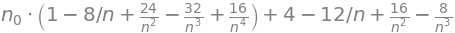

In [14]:
n,n0,n1,n2,n3,n4=symbols('n,n0,n1,n2,n3,n4')

n1 = (1-2/n)*n0+1
n2 = (1-2/n)*n1+1
n3 = (1-2/n)*n2+1
n4 = (1-2/n)*n3+1
ans = collect(expand(n4),n0)
ans

By induction the general case $ n_t$ can be found as given above. It is useful in the derivation to notice how the terms outside the bracket in the Sympy result are related to those inside. In this derivation $t$ is a discrete number but if we associate this with time and these time steps are made very small we may consider $t$ as a variable and then we can write the equation as

$$\displaystyle   n_{t}  = \frac{n}{2}+  \exp\left(t\ln\left(1-\frac{2}{n}\right)\right)  \left(n_0-\frac{n}{2}\right)$$

which can be simplified because $2/n\lt 1$ and the log can be expanded as a series giving

$$\displaystyle  n_{t}  = \frac{n}{2}+  e^{-2t/n}  \left(n_0-\frac{n}{2}\right)$$

which gives a lifetime of $\tau =n/2$ as found empirically. If $n_0=n$ then

$$\displaystyle   n_{t}  = \frac{n}{2}(1+  e^{-2t/n}) $$

which is the curve plotted in fig 10c. At long times the average value is $n/2$ also as observed in the simulation.

### **Recurrence**
To calculate recurrence a very long sequence of steps is needed, typically several million when $n=10$, because recurrence becomes increasingly rare as $n$ increases. The number of these is recorded when the initial state is re-formed. The *gaps* between these numbers is now saved and a histogram of them produces an exponential decay which shows that the recurrence times are exponentially distributed, $c \sim e^{-t/\tau_n}$ where 'c' represents the number of gaps with a given value, i.e. the histogram and $\tau_n$ the decay lifetime for $n$ molecules. A semi-log plot of the counts has values that closely follow the behaviour $y=2^{2n}$ as shown in figure 10d.

![Drawing](monte-carlo-fig10d.png)

Figure 10d. Left. The histogram of time gaps when the random walk recurs. The lifetime, in this case where $n=5$, is $270$ steps and has the equation counts $\sim e^{-t/270}$. Right. This plot shows log10 of the lifetimes $\tau$ for the decays of the type shown on the left *vs*. $n$, and the line for $2^{2n}$. The points much greater than $10$ take a very long time to accumulate enough points to form a measureable decay as shown in the left this figure, with $n=10$ typically only $\approx 30$ recurrences occur after five million steps. 
______________________

The recurrence time has been calculated analytically by M. Kac (American Mathematical Monthly, v54, p369, 1947) and if a state with $m$ white balls occurs the number of steps needed to recur is given, on average, by

$$\displaystyle \frac{(n+m)!(n-m)!}{(2n)!}2^{2n}$$

When $n \gt m$ the recurrence time is short as the ratio of factorials is $ \ll 1$. When $m \approx n$ the factorials evaluate to a number close to one and the recurrence time is maximised and is $\sim 2^{2n}$ as found by our simulation. Smoluchowski was probably first to understand that if one starts with a large number of molecules the recurrence time is so long that the process is for all practical purposes irreversible, but mathematically its not, but as the time needed soon becomes far, far longer than the age of the universe this is irrelevant.

### **Entropy**
As there is no heat of mixing, and the temperature and pressure are constant, entropy increase is the only process by which the free energy can decrease as the gases increase their volume and so mix, i.e. $\Delta G=-T\Delta S$. Figure 10c shows that eventually this 'system' comes to equilibrium and from thermodynamics the entropy should therefore be at a maximum. The entropy has the form $S=k\ln(W)$ after Boltzmann where $W$ is the number of configurations the atoms or molecules can have. In this example the configuration $W=1$ at the start of the simulation because there are no white balls (molecules) mixed in with the black ones and vice versa thus the entropy is zero. When fully mixed at equilibrium the number of configurations is given by the binomial coefficients $\displaystyle W=\frac{n!}{m!(n-m)!}$ because there are only two volumes, and there are $n$ white molecules in total and at any time $m$ black ones mixed in with them, where $m=0,1\cdots n$. This function $W$ has a maximum when $m=n/2$ as you can confirm by differentiating and using the Sterling approximation (Chapter 1-8). The maximum entropy is thus $S_{max} = k\ln(2^n)$. Perhaps this is to be expected because the volume doubles there are a maximum of $2^n$ ways of being in this new larger volume. 

## 3.4 Reacting molecules.

### **(i) Reaction $A\to B$**

Many molecules react by a first-order process; $A\overset{k}\to B$, e.g. $\mathrm{CH_3CN} \to \mathrm{CH_3NC}$, a cis - trans isomerisation or the decay of an excited state. A first-order decay was calculated by the Gillespie method in Section 2.2, but the method used there is very different to this one. 

Imagine instantly starting a reaction and then being able to observe each molecule individually and record the instant $t$ that each reacts. Each molecule follows a first-order process, the probability of not having reacted up to time $t$ is $p = e^{-kt}$, where $k$ is the rate constant and the lifetime $\tau$ for the reaction is $\tau = 1/k$. Observing these times for different molecules allows the probability distribution to be made and the reaction rate constant or lifetime calculated. The lifetimes of excited states and of first-order reactions have a huge range from $\approx 10^{-13}$ to $\gt 10$ s. The lifetimes of radioactive nuclei range from a few seconds to thousands of years.

When we simulate the population of a species, the distribution of reaction times has to be known. This can be achieved by inverting the exponential equation to produce the time and guessing the probability $p$, from a uniform distribution between zero and one. The list of times produced by repeatedly doing this are then made into a histogram and displayed, and, if enough events are recorded, a decay similar to one that could be observed experimentally will be produced. The time $t$ that a molecule reacts, not having reacted up to that time, is

$$\displaystyle  t=-\frac{1}{k}\ln(p)\qquad\tag{13}$$

and $p$ is guessed from a uniform distribution in the range $0 \to 1$.

One way of doing the calculation is shown below. A histogram of time intervals is made by making the time into an integer index of an array and then adding up the number of times this index occurs. The array is called $\mathtt{fcount}$; the maximum time is $\mathtt{maxt}$ and the number of bins in the histogram, 'bins'. The method is:

**(1)**$\quad$ Define parameters; set arrays to initial values;

**(2)**$\quad$ Repeat the following calculation in a 'for' loop. 

$\qquad$ Calculate $t=-\ln(p)/k$, where $p$ is a random number $0 \to 1$.

$\qquad$  Convert $t$ to an integer to use as array index (see code below).

$\qquad$ Add up the number of events with this index in $\mathtt{fcount}$.

The Python code is shown below with 50000 events placed in a histogram of $500$ bins. The reaction lifetime $\tau = 50$. In the simulation, the time - scale need not be explicitly defined; each time unit could be femtoseconds or years; it all depends on the reaction.

In [15]:
rng = np.random.default_rng()                # initialise random number generator
events= 50000         # integer
bins  = 500           # integer
maxt  = 500.0
tau   = 50.0          # e.g. ns
fcount= np.zeros(bins,dtype=int)
dtime = np.zeros(bins,dtype=float)

for i in range(bins):
    dtime[i]= maxt*(i+1/2)/bins               # make time bins, 1/2 to put in mid bin
    pass

for i in range(events):
    p = np.random.ranf()                      # random number 0..1
    t = -tau*np.log(p)                        # time it fluoresces 
    indx = int(np.round(bins*t/maxt) )        # make into integer. *bins/maxt to make it dimensionless
    if indx < bins:                           # check does not exceed limit
        fcount[indx] = fcount[indx] + 1       # add photon to count
    pass

#plt.plot(dtime,fcount)       
#plt.yscale('log')
#plt.ylim([0.1,1e3])
#plt.show()

Some results are shown in figure 11. On the left, the time a molecule remains excited (residence time) is plotted vs. the event number. Although there are some long times the average time is about $50$, which is the lifetime of the ensemble of molecules. The histogram of these times from the left figure produces the right-hand one when plotted on a log scale. This data looks just like that determined experimentally by time-correlated single photon counting experiments used to measure the excited state lifetime of a molecule or atom.

![Drawing](monte-carlo-fig11.png)

Figure 11 Left: The residence times vs event number for $500$ events. Right: A histogram of the natural logarithm of the number of counts in each time channel in the simulation of a first-order rate process together with an exponential decay with the same decay time; $\tau = 50$ in this example, and $200000$ events have been recorded.

### **(ii) Reaction $A\to B\to C$**

The Monte-Carlo method can be extended for example to 

$$\displaystyle A \overset{k_A}\to  B \overset{ k_B} \to C$$

by recording the total time when intermediate B is produced.  Molecule A decays at time 

$$\displaystyle t_A=\tau_A\ln(p_1)$$

where $p_1$ is a random number in the range $0\to 1$ and $\tau_A=1/k_A$ is A's lifetime. Molecule B cannot be formed before this time, and then it takes A time 

$$\displaystyle t_B = \tau_B\ln(p_2)$$

to react so that B is formed at time $t_A + t_B$, where $p_2$ is another random number in range $0\to 1$. The times $t_A+t_B$ are recorded, binned, and a histogram of the number of B produced is made. Figure 11a shows such a calculation with $\tau_A=50, \tau_B=30$. 

The equations for the $A\to B\to C$ scheme are, of course, well known, see chapter XX. The rate constants used to make the figure are $k_A=1/\tau_A, k_B=1/\tau_B$ and the amount of B is given by 

$$\displaystyle[B]=[A_0]\frac{k_B}{k_A-k_B}(e^{-k_Bt}-e^{-k_At})$$

and this is shown on a linear scale in the figure together with the simulated data.  To observe the rise of C as the number of trials, and hence molecules, is fixed this can be found by subtracting the numbers of A and B in each bin from this number.  If a more complex scheme is required such as molecule B reacting to produce another product D as well as C, then the fraction of molecules to pathway C (or D) needs to be found. The fraction going to C would be $k_B/(k_D+k_B)$ and this is made by examining whether the random number is in the range $0 \le k_B/(k_D+k_B)$ or greater than this.

![Drawing](monte-carlo-fig11a.png)

Figure 11a. Simulation of reaction $A\to B\to C$. The lifetime of molecules A and B is $50$ and $30$ respectively. The solid lines show the populations using the analytical equations and needed no adjustable parameters to fit. The simulated curves were made with $50000$ events and the signal to noise ratio will clearly improve if more trials (events) are made, but only as $\sqrt{events}$. The rise and fall of B's population is clear.
_____

## 3.5 Step-Growth polymerisation

In synthetic polymers the length of the chain is determined entirely by random events. In addition reactions it depends the lifetime of the carrier chain and in condensation reactions by the presence of a reactive group. These process are random in nature and they add monomer molecules in a step-wise manner to the chain, but the chains do not grow endlessly because there is a small but finite chance of being terminated that happens at random. Consequently, any polymer has a distribution of chain lengths and hence molar mass and this distinguishes polymers from simple molecules. The chain length can be calculated statistically and the number and weight average molar mass of polymer chains is given in Chapter (Summations & Series) 5-4.2. The process can also be simulated as outlined next. The features of step-growth polymerisation are (J. Cowie & V. Arrighi Polymers: Chemistry and Physics of Modern materials publ. CRC Press 2007 3rd ed.) 

(1) Any two molecular species can react,
(2) Most monomers are incorporated early on in the reaction.
(3) The chain length increases steadily during reaction.
(4) High conversion is needed to form long polymers which also takes time.

### **(i) Algorithm 1**

The distribution of chain lengths is computed using a Monte-Carlo method. An array is made whose indices each represent one polymer chain. The value at each index gives the length of the chain, initially set to zero. At each step in the simulation the number $1$ is added to each element of the array, unless a random termination event has occurred and then a zero is added for this step and all future ones at this index, i.e. this particular chain's growth is halted. After repeating this many times a histogram is made of the chain lengths. The histogram records how many chains of a given length occur and groups these into 'bins' of a given width. A plot is made of the number of events (length of the chain) vs. the length itself. The random or Monte-Carlo part enters only in the termination step. A certain number of chains are chosen at random to be terminated on each round, this means that we must know the extent of reaction labelled $p$. The longer the rounds adding a molecule go on for, the longer the chain gets but also the greater the chance of termination. Thus, at the end of the process there are many chains of short length and fewer long ones. The maximum chain length is the number of rounds or repetitions.  

### **(ii) Algorithm 2**

There is a second way of calculating the length distribution that is similar to the method developed in the previous section for an excited state. In this we determine the length of the chain at termination, rather than time of decay, from the probability of reacting and compute the length at which it is terminated, repeat this many times and then form a histogram. The lifetime $\tau$ used with a decaying molecule is replaced by the chain length, $tau$ being the length at which the distribution of lengths has fallen to $1/e\approx 0.37$ of its initial value. 


### **(iii) Statistical approach**

We have to answer the question; how shall we know that the Monte-Carlo simulation represents anything approximating theory or even reality? To answer this we need to use statistical theory model the distribution of polymer chain lengths. The number and weight averages can be calculated from the Monte-Carlo data, but these are only point measures of the polymer's length and mass distribution, the distributions themselves are really needed. Using arguments based on probability these distributions can be calculated (Cowie & Arrichi 2007), and the starting point is Carothers' equation. Carothers pioneered step-growth reactions and invented nylon 66. 

Let $x_n$ be the number average chain length which is defined as 

$$\displaystyle x_n=\frac{n_0}{n}$$

where $n_0$ is the original number of molecules present as monomers, and $n$ the number of all molecules able to react at a later time $t$, which included all potentially reactive polymers. The total number of functional groups that have reacted is therefore $(n_0-n)$  and then the extent of reaction $p$ is the fraction

$$\displaystyle p=\frac{n_0-n}{n},\quad\text{or}\quad n=n_0(1-p)$$

Combining this with $x_n$ gives the Carothers equation

$$\displaystyle x_n=\frac{1}{1-p}=\frac{n_0}{n}$$

This equation is particularly useful. Suppose there is $50$% reaction then the average chain length is surprisingly only $2$. It follows that if we want a long average chain length of, say, $100$ then $p$ has to be large, e.g. when $x_n = 100, p = 0.99$ which means $99$% conversion therefore the reaction must be driven almost to completion. This also gives us an indication that in our simulation $p$ has to be very close to unity. 

A chain grows as monomers are added, and if there are $x$ chains at time $t$ then $x-1$ are left after the next step and the probability that $(x-1)$ groups have reacted is $p^{x-1}$, where $p$ is the extent of reaction. A group unreacted has a probability of $(1-p)$ and therefore the probability $p_x$ of finding a chain of $x$ units long is the product of reacting up to that time and not yet having reacted which is 

$$\displaystyle p_x=(1-p)p^{x-1}$$

and since $p_x=n_x/n$ is the fraction of finding $n_x$ in a total of $n$ polymers, 

$$\displaystyle n_x=n(1-p)p^{x-1}$$

Substituting for $n$ using the Carothers equation gives the distribution

$$\displaystyle n_x=n_0(1-p)^2p^{x-1}$$

Although not apparent, this equation has a shape very close to an exponential decay as in fig 11b below, The histogram formed from chain lengths, which is the plot of the number of chains of length $n_x$ (of mass $m_0n_x)$ vs. $x$ is ideally of the same shape as this distribution. This distribution should be what is obtained from the simulation. The number average molar mass in terms of extent of reaction $p$ is from the Carothers equation

$$\displaystyle \langle m_n\rangle = \frac{M_0}{1-p}$$

where $m_0$ is the mass of the monomer and is also given by $\displaystyle \langle m_n\rangle =\frac{\sum n_im_i}{N}$, see Chapter (Summations & Series) 5-4.2.

The distribution of mass/weight fraction is slightly different, weighted more to higher mass. If we use the mass fraction $w_x = xn_x/n_0$ then

$$\displaystyle w_x = x(1-p)^2p^{x-1}$$

where $x$ can be chosen to be either the number, $x$, of monomer units, or the mass of $x$ monomers. The weight average molar mass in terms of $p$ is 

$$\displaystyle \langle m_w\rangle = M_0\left(\frac{1+p}{1-p}\right)$$

and the ratio of the weight to number averages when $p=1$ is $2$ which is close to what is observed because $p$ will be close to unity. The weight average molar mass as a summation of chain lengths and masses is 

$$\displaystyle \langle m_w\rangle =\frac{\sum n_im_i^2}{\sum n_im_i}$$

The simulation shows (fig 11d) that this gives good agreement with the predicted data based on statistical arguments.

### **(iv) Simulation**

The code to do the algorithm 1 simulation is shown below. The array 'chains' represents the polymers, the value at each index is the polymer length, e.g. chains[4] = 10 means that chain $4$ has length $10$. The array 'term' is either $1$ or $0$ and the whole array is added to the chains. Python allows whole arrays to be added without specifying indices but using $[:]$. The parameter $z$ is the number of chains to be terminated at each round. The plots are scaled to take into account the width of the bins used in the histogram.

Sometimes when making the histogram, the way the histogram's algorithm works to partitions the number of events into each bin can sometimes cause points to appear in a regular pattern being either too high or too low or both. This unphysical behaviour can be corrected by choosing a different number of bins, for example by doubling, plotting, re-choosing, re-plotting etc. until this effect disappears. 

In [16]:
# Algorithm 1. Step-wise chain growth polymerisation 

rng = np.random.default_rng()           # initialise random number generator

reps = 1000                             # repeat addition
n = 100000                              # number of chains
p = 0.99                                # prob of growth over termination
z = int(n*(1-p))                        # number of guesses to terminate 

chains = np.zeros(n,dtype=int)          # array holds all chain lengths
term   = np.ones(n, dtype=int)          # array holds 1 or 0 for growth or termination

for i in range(reps):
    chains[:] = chains[:] + term[:]     # add arrays index by index
    rand_indx = rng.integers(n,size= z) # choose index of z numbers at random
    term[rand_indx[:]]= 0               # make chosen ones zero                
    pass

# now plot data. Make histogram of number of chains of mass m, vs mass m then plot

#nbins = 200                             # number of bins for histogram
#num_at_m, m = np.histogram(chains,bins = nbins)      # returns number with mass m, vs mass
#
#m_i = np.array([m[-1]/nbins*(i+0.5) for i in range(nbins)] )  # m_i puts mass at centre of bin
#sc = np.sum(chains)   # total weight
#delta_mi = m_i[2]-m_i[1]                             
#figx, (ax1, ax2) = plt.subplots(1, 2,figsize=(9,4))    
#ax1.fill_between(m_i, num_at_m, color='lightgrey')   # fill histogram points
#ax1.scatter(m_i, num_at_m,s=5,color='red')           # plot as points
#ax2.scatter(m_i,num_at_m*m_i/sc/delta_mi,s=5,color='red')  # plot mass weighted distribution
#plt.show()

![Drawing](monte-carlo-fig11d.png)

Fig. 11b. Left Histogram of the number of chains of mass $m$ vs. the mass $m$, (grey) and red dots on a log scale.  The solid line (blue) is the number distribution  $ n_x = n_0(1-p)^2p^{x-1}$ which is close to an exponential decrease. The average $\langle m_n\rangle = 99$ is also shown. Right, the theoretical weight distribution $w_x = x(1-p)^2p^{x-1}$ (blue) with the Monte-Carlo calculated distribution 'num_at_m x m_i' vs 'm_i' which is $m\times n_x$ vs $m$. The average $\langle M_w\rangle =200$ is also shown.
______________

### Algorithm 2. Simulation 

An alternative approach to the simulation allows a chain to live for a certain time and is then terminated. The 'lifetime' of the chain is $1/(1-p)$ in terms of the chain length and the 'time' is $-1/(1-p)\ln(rand)$ where 'rand' is a uniformly distributed random number in the range $0\to 1$. The list of chain lengths is made into a histogram as before. The code is simple and gives the same results as the other method.

In [17]:
# Algorithm 2. Step-wise chain growth polymerisation 

reps= 100000                       # number of calculations
p   = 0.99                         # prob of growth over termination
tau = 1/(1-p)                      # length of chain when distribution is 1/e of maximum
chains= np.zeros(reps,dtype=int)   # array holds all chain lengths

for i in range(reps):
    rnum = rng.uniform()                      # random 0..1
    chains[i] = -tau*np.log(rnum)
    pass
# in condensed form the loop is condensed into one line

#chains[:] = -1/(1-p)*np.log( rng.uniform(size=reps) )

## 3.6 Simulation of an equilibrium  reaction $A \rightleftharpoons 2B$

In reactions where we are not particularly interested in the time course but in their equilibrium a straightforward approach is to allow the reaction to occur at each step of the simulation and count the number of each type of molecule present. The reaction $\mathrm{N_2O_4} \rightleftharpoons \mathrm{2NO_2}$ or in general $A \rightleftharpoons 2B$ is used as an illustration. If we start with only A molecules then we expect A to decrease and B increase until the rate forwards is equal to the rate back when equilibrium is reached. The equilibrium mole fraction of A and B will change with the initial amount of A. If at equilibrium more A is added then we expect the reaction to produce more B, and vice-versa. We can test this with the Monte-Carlo calculation, the key point being that at each step we add to or subtract from the total A and B molecules depending on whether a forwards or reverse reaction has been chosen. First we will workout what the maximum fraction of sites A can initially fill because there are only a finite number of them. The algorithm and details set out below is based on that by Kraska (J. Chem. Educ. 2022, v99, 2026).

Let there be $n_0$ molecules of type $A$ out of a total of $N$ sites and let $n_a$ be the number of type A present at equilibrium, thus $n_a = n_0-n_e$ and $n_b = 2n_e$ where $n_e$ have reacted. The equilibrium constant in terms of the number of molecules is,

$$\displaystyle K_e=\frac{n_b^2}{n_a}=\frac{4n_e^2}{n_0-n_e}$$

which, when solved for $n_e$, gives

$$\displaystyle n_e= \frac{-K_e+\sqrt{K_e^2+16K_e n_0} }{8}\tag{13a}$$

If $k_1,k_2$ are the forward and reverse rate constants the respective *rates*, 

$$\displaystyle R_1 = k_1n_a, R_2 = k_2 n_b^2$$

are equal at equilibrium and if we interpret these as probabilities per unit step the forward rate is 

$$\displaystyle R_1=\frac{n_a}{N}$$

and the backward bimolecular rate 

$$\displaystyle R_2=\frac{n_b}{N}\left(\frac{n_b-1}{N-1}\right)$$

This expression occurs because once we have chosen a site there is one less left to choose from a second time. When $n_b$ and $N$ are both far greater than one $\displaystyle R_2=\frac{n_b^2}{N^2}$ without significant error. At equilibrium $R_1 = R_2$ and $K_e$ is found using 

$$\displaystyle \frac{n_a}{N} = \frac{n_b^2}{N^2}$$

thus, with definition above, 

$$\displaystyle K_e = N$$

which now allows us to calculate $n_e$ and hence the mole fraction of A and B molecules at equilibrium  for any $n_0$. In fact this is not quite true because the total number of sites is fixed at $N$ and each A produces two B's so there is a maximum valid number of initial A's. This is worked out by substituting for $n_e$ in $n_a = n_0-n_e$ to give $n_a=n_0-n_b/2$ and then solving for $n_0$ in 

$$\displaystyle n_a=n_0-\sqrt{n_aK_e}/2$$

where the definition of the equilibrium constant was used, $n_aK_e=n_b^2$. The maximum $n_0$ is $\approx 0.691N$.

The differential equation for the number of A molecules is

$$\displaystyle\frac{dn_A}{dt}=-k_1n_a+k_2n_b^2$$

which is simplified substituting $n_a = n_0-n_e$ and $n_b = 2n_e$ to give 

$$\displaystyle \frac{dn_e}{dt}= k_1(n_0-n_a)-4k_2n_e^2$$

This can be solved analytically but has a rather complicated solution, and it is easier to integrate numerically using, for example, the Euler method described in chapter 11-4.1. The rate constants are known from the rate expressions given above.

### **(i) Algorithm outline**

An array larger than the total initial number of all molecules is made and is used to hold the 'molecules' distinguished by their value, for example, we can choose $ \mathrm{Empty=0, A=1, B=2}$. The molecule's positions are initially chosen at random. You may wish to imagine this as a 2D array partially filled with molecules of type A and B, but as we shall not insist that when A breaks up into two B's that these must be on adjacent sites, or that when 2B's react they are also adjacent, we can simply use a 1D array. We can do this only because we are counting the number of A and B at each step, we make no assumptions about any mechanism. Furthermore as the total number of sites is fixed, this is equivalent to a fixed volume, but if we change the number of molecule present the density changes, which in a real gas would be a pressure change, for example via the ideal gas equation. 

We  do not check at each step whether a molecule has enough energy to react, therefore temperature is not directly involved in the simulation other than that it is sufficiently high that reaction always occurs. When equilibrium is reached, more molecules can be added and the response of the system observed. The initial number of A must be $\le 0.691\cdot\mathrm{sites}$ (explained above), no other check is made. If this is not followed the calculation still runs but the result is meaningless.

 The instructions are put into a procedure (def calc():) and this in a loop for the number of repeated trials needed, for example $40000$. 

$\displaystyle \begin{array}{lll}
(1) & \text{Choose one site at random, i.e. A, B or empty.} \\
(2)& \text{If it is A, replace it by B and choose another empty site and make it B.}\\
& \text{Change } n_A \to n_A - 1,\quad n_B \to n_B + 2\\
(3) &\text{If B is chosen, choose another site at random.}\\ 
    &\text{If it is B, empty this site and change the previous B chosen into A.}\\
    &\text{Change }n_A \to n_A + 1,\quad n_B \to n_B - 2\\
    (4)&\text{If the site is empty do nothing.} \end{array}$
    
At each step with index $k$, we count the number of type A and type B molecules present and the mole fraction as $\mathrm{mfA[k]=n_a/(n_a+n_b)}$ for A molecules and $\mathrm{1-mfA[k]}$ for B molecules. These are plotted vs. number of tries. 

In [18]:
#-------------------------------
def fill_sites(n,Q):
    k = 0
    while k < n:                     # make exactly n sites equal to A
        i = rng.integers(sites)   
        if M[i] == 0:
            M[i] = Q
            k = k + 1
    return M
#--------------------------------
def findempty():                     # Search for empty site in array to make into B
    for k in range(sites):
        if M[k] == Empty:
            break 
    return k
#--------------------------------
def calc():                          # choose A=0, B=1, empty=2
    j = rng.integers(sites)          # choose an index at random
    a = 0
    b = 0
    if M[j] == A :                   # if type A Step (ii)
        M[j] = B
        i = findempty()
        M[i] = B
        a = - 1                      # will reduce na by 1
        b = + 2                      # will increase nb by 2
    elif M[j] == B :                 # if type B. Step(iii)
        k =  rng.integers(sites)     # choose 2nd site at random
        while k ==  j:               # but dont choose site  again
            k = rng.integers(sites)
            pass    
        if M[k] == B:                # is B
            M[j]= A                  # was B now make site A
            M[k]= Empty              # make site k empty so remove one B
            a = + 1
            b = - 2
            pass
    return a,b                       # return increments to numbers of A & B.
#--------------------------------

rng = np.random.default_rng()         # initialise random number generator

sites = 10000                         # number of sites
reps  = 20000                         # repeat calc'n

A = 1                                 # codes for molecules
B = 2
Empty = 0

na = 2000                             # Must be < 0.691 * sites. starting number of A and B
nb = 0
n = na + nb

M   = np.zeros(sites,dtype=int)       # store array
mfA = np.zeros(reps)                  # mole fraction of A
x   = np.zeros(reps,dtype=int)        # array index
for i in range(reps):                 # make array of integers for plotting only
    x[i] = i

M = fill_sites(na,A)
if nb != 0:
    M = fill_sites(nb,B)

a = 0                                 # na increments
b = 0                                 # nb increments
k = 0
while k < reps:                       # main loop of calculation
    mfA[k] = na/(na + nb)           # mole fraction of A
    a, b  = calc()                    # return increments in A and B
    na = na + a                       # a,b are changes in na and nb
    nb = nb + b 
    k = k + 1
    pass

#plt.plot(x,mfA)
#plt.plot(x,1-mfA)
#plt.show()

![Drawing](monte-carlo-fig11b.png)

Fig 11c. Monte-Carlo calculation of the $A\rightleftharpoons 2B$ reaction. Left mole fractions of A and B vs. number of steps, which are proportional to time. The initial number of A was $2000$ and total number of sites was $10000$. Right: The rates of reaction become equal at equilibrium. See text for details.
_______

Figure 11c shows the mole fraction as the reaction evolves, with an initial number of $2000$ A molecules. After about $25000$ steps each mole fraction has become constant and equilibrium is reached. This can also be determined by plotting the reaction rate for $A\to 2B$ and $2B\to A$. From the discussion above the rates are 

$$\displaystyle R_1=\frac{n_a}{N}\quad\text{ and }\quad \displaystyle R_2=\frac{n_b}{N}\left(\frac{n_b-1}{N-1}\right)$$

and these are equal at equilibrium as can be seen on the right of fig 11b. As the number of 'molecules' is relatively small, $\le 10000$ fluctuations about equilibrium can be seen. Using eqn 13a the mole fraction can be calculated as $(n_0-n_e)/(n_0+n_e)$ and compared to that obtained from the simulation. For the data in fig 11b the mole fraction of A is $0.214$ while that from eqn 11a is $0.208$. The comparison the the calculated values of the mole fraction vs. the simulated ones show that the two numbers agree to two decimal places when rounded, and the largest difference being when $n_0$ is small.

### **(ii) Adding more A or B at equilibrium**
If, when equilibrium is reached, the number of A or B is changed and a new equilibrium position will be reached eventually as more A will convert to B or *vice versa*. This change is done at constant volume as the number of sites is unchanged in the simulation. This is shown in figure 11c, where there are initially $n_0=2000$ A and after $\approx 40000$ steps $1000$ more A are added to vacant sites. The final mole fractions and rates are those as if initially $n_0=3000$. 

When the addition is made the mole fraction of A suddenly rises and that of B falls, simply because the total mole fraction must add to one. The rates on the other hand (as shown in the right hand panel) are proportional to the numbers of A and B and we can see that as more A is injected the number of these suddenly rise then slowly fall as the predominant reaction is, until equilibrium is established, $A\to B$. The number of B rises continuously until equilibrium is re-established. If B had been added the similar behaviour is observed but with A and B reversed. This behaviour when returning to equilibrium accords with that expected when perturbing an equilibrium and expressed as the Le Chatelier principle.

The differential equation for the number of A molecules given above is 

$$\displaystyle\frac{dn_A}{dt}=-k_1n_a+k_2n_b^2$$

and at equilibrium if this is disturbed by a small change $\Delta$ to the number of type A molecules then $n_a\to n_{ae}-\Delta, n_b\to n_{be}+2\Delta$ where $n_e$ is the equilibrium amount, hence

$$\displaystyle\frac{d\Delta}{dt}=k_1(n_{ae}-\Delta) -k_2(n_{be}+2\Delta)^2$$

At equilibrium as $k_1n_{ae}=k_2n_{be}^2$ by expanding and substituting gives, after some canceling,

$$\displaystyle\frac{d\Delta}{dt}=-(k_1+4k_2)\Delta -4k_2\Delta^2$$

If the change $\Delta$ is small the $\Delta^2$ term is even smaller and can be ignored. This produces

$$\displaystyle\frac{d\Delta}{dt}=-(k_1+4k_2)\Delta $$

which is a first order decay of the perturbation back to equilibrium. This is observed in the simulations, but only after much averaging since the perturbation has to be small, and not in fig. 11c where for clarity too large a perturbation was used for this approximation to be accurate. 

![Drawing](monte-carlo-fig11c.png)

Fig 11d. Monte-Carlo calculation of the $A\rightleftharpoons 2B$ reaction. Left mole fractions of A and B vs. number of steps, which are proportional to time. The initial number of A was $2000$ and total number of sites was $10000$. Right: The rates of reaction become equal at equilibrium. At $\approx 40000$ steps $1000$ A were added. The change in numbers show how the equilibrium is reestablished, its final value is as if $n_0=3000$ A had been present initially. Naturally the data is noise as only a limited number of samples are taken.